Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf

2025-11-20 08:15:30.582250: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading csv and converting it to a dataframe

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('./magic+gamma+telescope/magic04.data', names=cols)

Displaying first 5 rows of the data

In [3]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Converting the class column to numeric

In [ ]:
# Check the different classes
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class'] = (df['class']=='g').astype(int)

In [6]:
df['class'].unique()

array([1, 0])

Check relationship between the features and the target using histograms

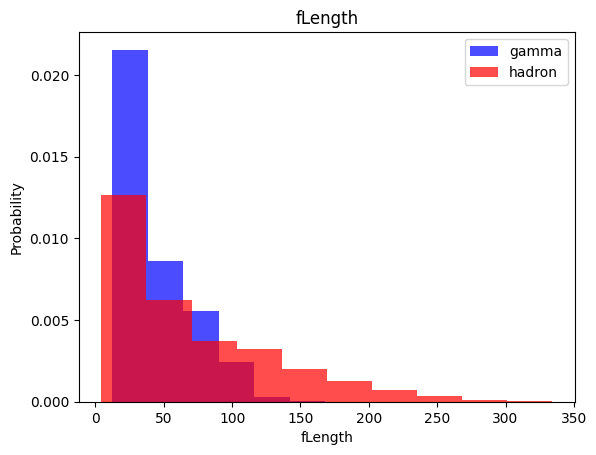

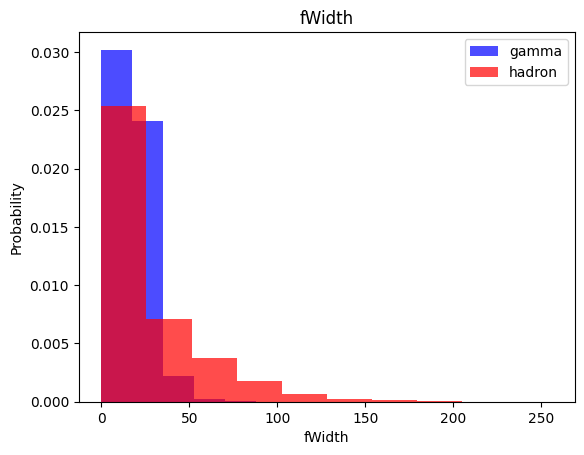

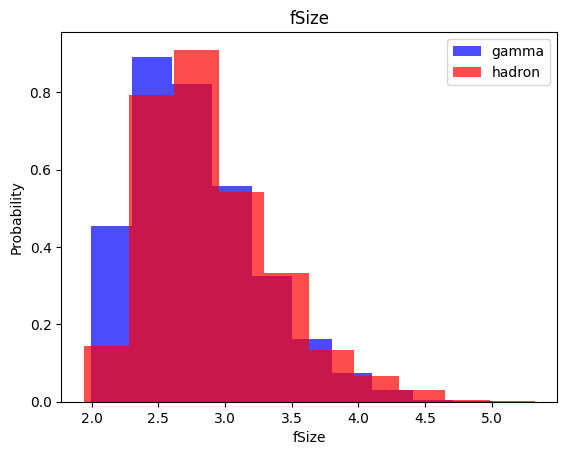

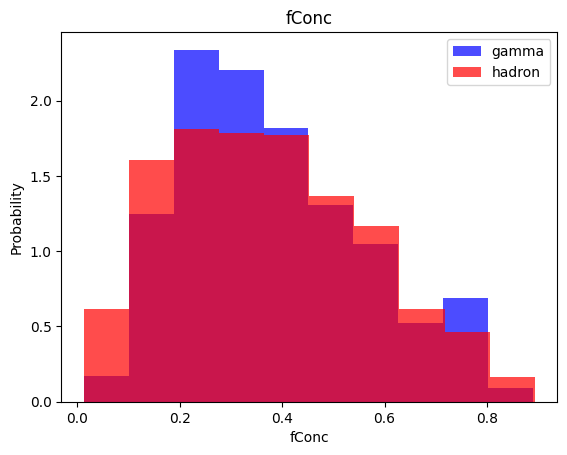

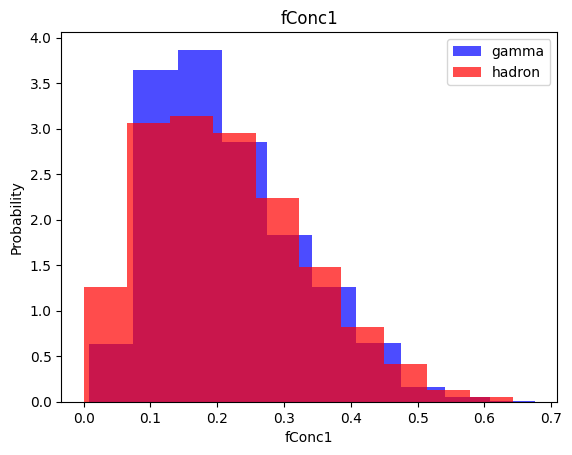

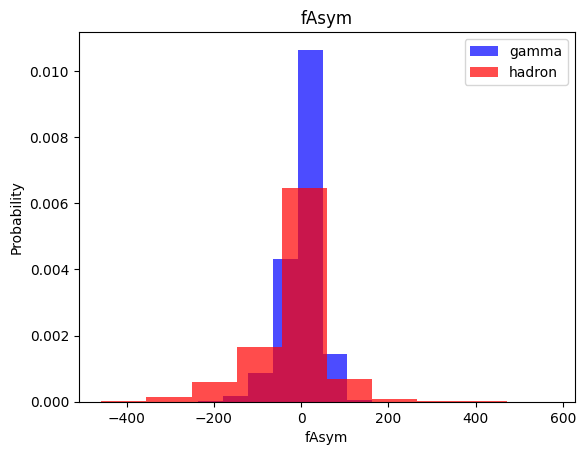

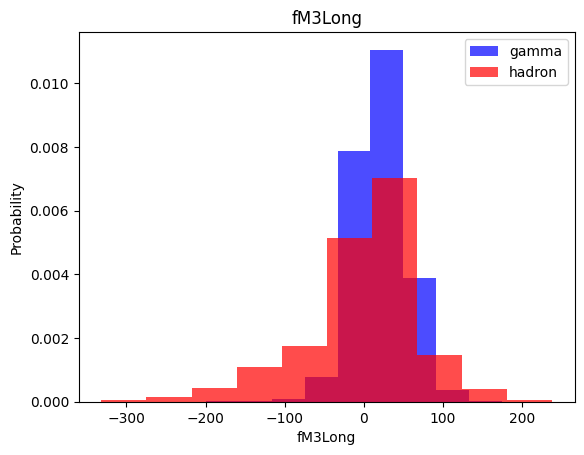

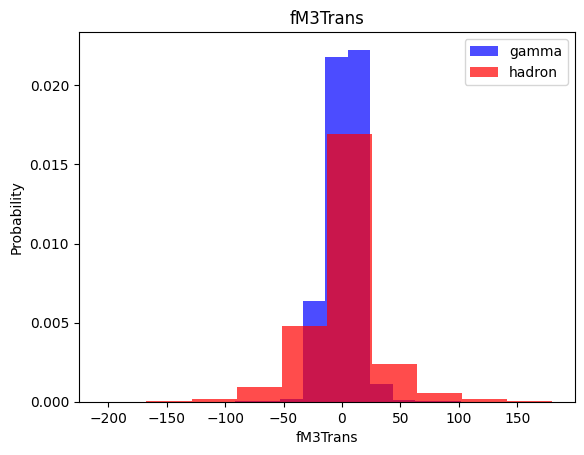

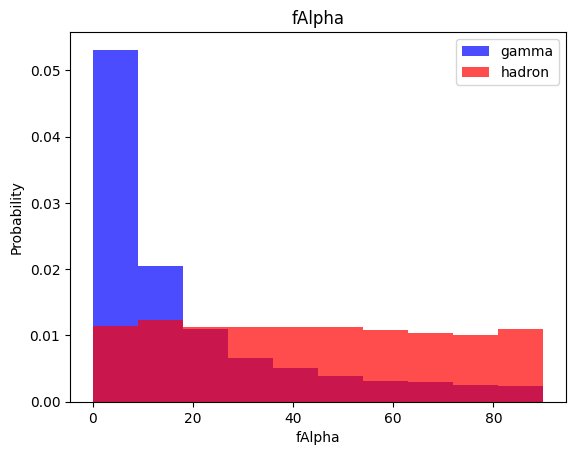

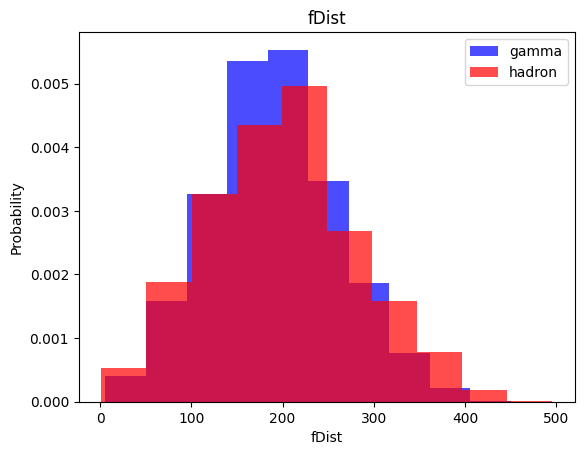

In [7]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], label='gamma', color='blue', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], label='hadron', color='red', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

Split into train, validation and test sets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/Users/jokello/Projects/DS/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scale and sample the data

In [ ]:
def scaler_func(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack(X, np.reshape(y, (-1, 1)))

    return data, X, y

In [10]:
train, X_train, y_train = scaler_func(train, True)
valid, X_valid, y_valid = scaler_func(valid, False)
test, X_test, y_test = scaler_func(test, False)

KNN(k-nearest-neighbors)

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1373
           1       0.85      0.86      0.85      2431

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



Naiver Bayes

In [13]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [14]:
y_pred_nb = nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1373
           1       0.73      0.90      0.80      2431

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

In [15]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1373
           1       0.83      0.83      0.83      2431

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector Classifier

In [17]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
y_pred_svc = svc_model.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1373
           1       0.89      0.89      0.89      2431

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



Nueral Network

In [38]:
def train_model(X, y, num_nodes, dropout_prob, lr, batch_size, epochs, loss, metrics):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10, )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss=loss, metrics=metrics)
    history = nn_model.fit(X, y, batch_size, epochs, validation_split=0.2, verbose=0)

    return nn_model, history


In [20]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Entropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    fig.show()

In [ ]:
list_nodes = [16, 32, 64]
list_dropouts = [0, 0.2]
list_lr = [0.01, 0.005, 0.005]
list_batchsize = [32, 64, 128]

def find_best_nn(list_nodes, list_dropouts, list_lr, list_batchsize):
    least_val_loss = float('inf')
    least_loss_model = None
    epochs = 100
    for num_nodes in list_nodes:
        for dropout_prob in list_dropouts:
            for lr in list_lr:
                for batch_size in list_batchsize:
                    print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
                    model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs=epochs, loss='binary_crossentropy', metrics=['accuracy'])
                    plot_history(history)
                    val_loss = model.evaluate(X_valid, y_valid)[0]

                    if val_loss < least_val_loss:
                        least_val_loss = val_loss
                        least_loss_model = model
    return least_loss_model


# y_pred_nn_model = find_best_nn(list_nodes, list_dropouts, list_lr, list_batchsize).predict(X_test)
# y_pred_nn_model = (y_pred_nn_model>0.5).astype(int).reshape(-1, )
# print(classification_report(y_test, y_pred_nn_model))